In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Vals = np.load('Eigenvalues.npy',mmap_mode='r')
Vecs = np.load('Eigenvectors.npy',mmap_mode='r')

In [11]:
lags = np.loadtxt('fff0/data/tau.txt')
Vals = []
Vecs  =[]
for lag in lags.astype(int):
    
    C = np.loadtxt('fff0/data/Cxy'+str(lag)+'.txt')
    s = C.sum(axis=1)
    s[s==0]=1.
    T = C/s[:,None]
    
#     T[np.isnan(T)]=0
    vals,vecs =np.linalg.eig(T.T)
    Vals.append(vals)
    
#     vals,vecs = np.linalg.eig(C)
    Vecs.append(vecs)
Vals = np.array(Vals)
Vecs = np.array(Vecs)

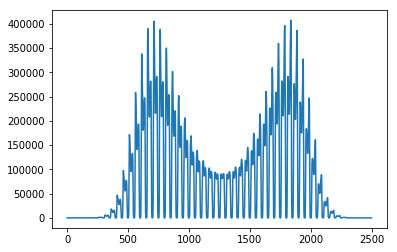

In [22]:
plt.plot(s)

/usr/local/sw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in log


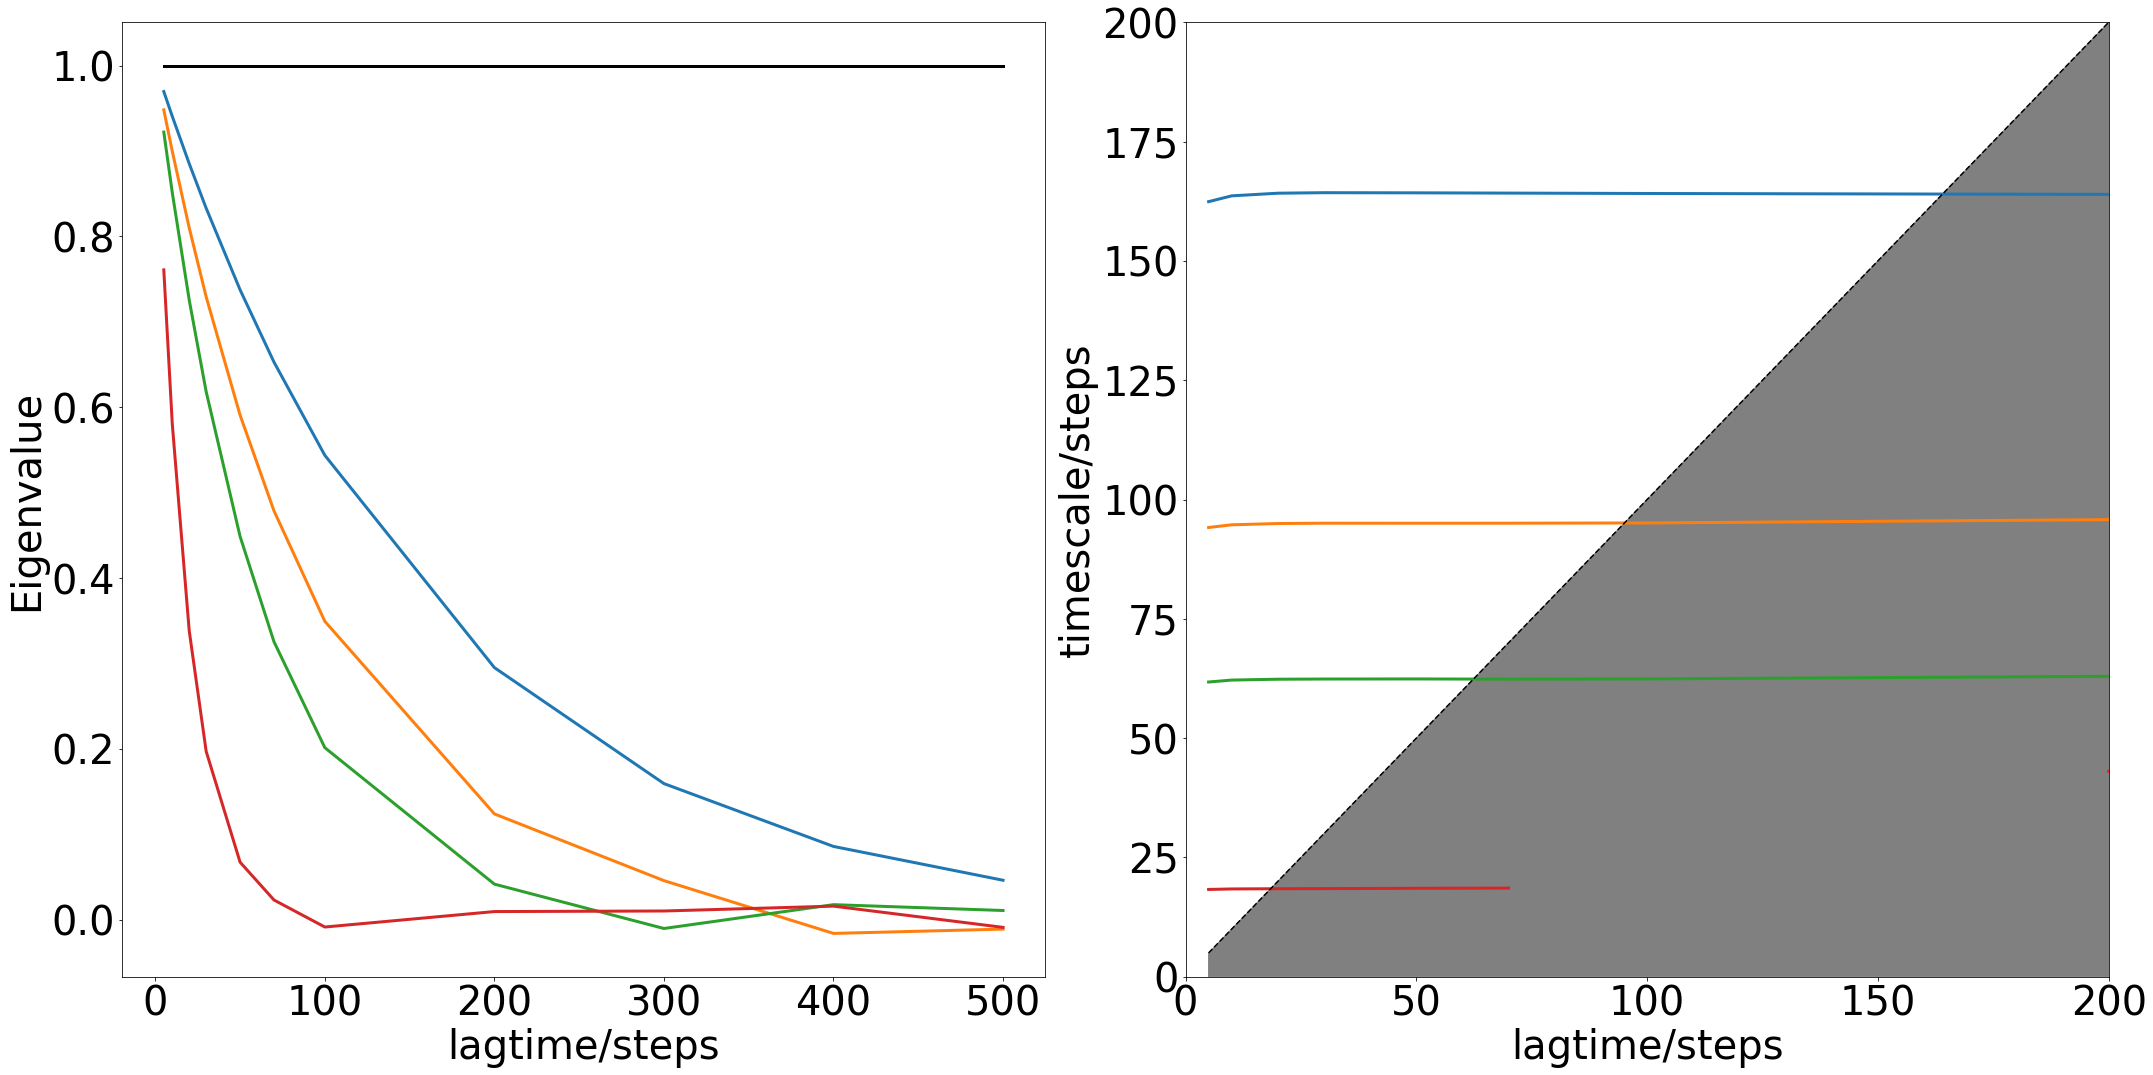

In [849]:
plt.figure(figsize=(30,15))
fs=40
plt.subplot(121)

plt.plot(lags,Vals[:,0],'k',linewidth=3,)
plt.plot(lags,Vals[:,1:5],linewidth=3)
plt.xlabel('lagtime/steps',size=fs)
plt.ylabel('Eigenvalue',size=fs)
plt.tick_params(labelsize=fs)




plt.subplot(122)
plt.plot(lags,-lags[:,None]/np.log(Vals[:,1:5]),linewidth=3,)
plt.xlim(0,200)
plt.ylim(0,200)
plt.plot(lags,lags,'k--')
plt.fill_between(lags,lags,color='grey')
plt.xlabel('lagtime/steps',size=fs)
plt.ylabel('timescale/steps',size=fs)
plt.tick_params(labelsize=fs)

plt.tight_layout()

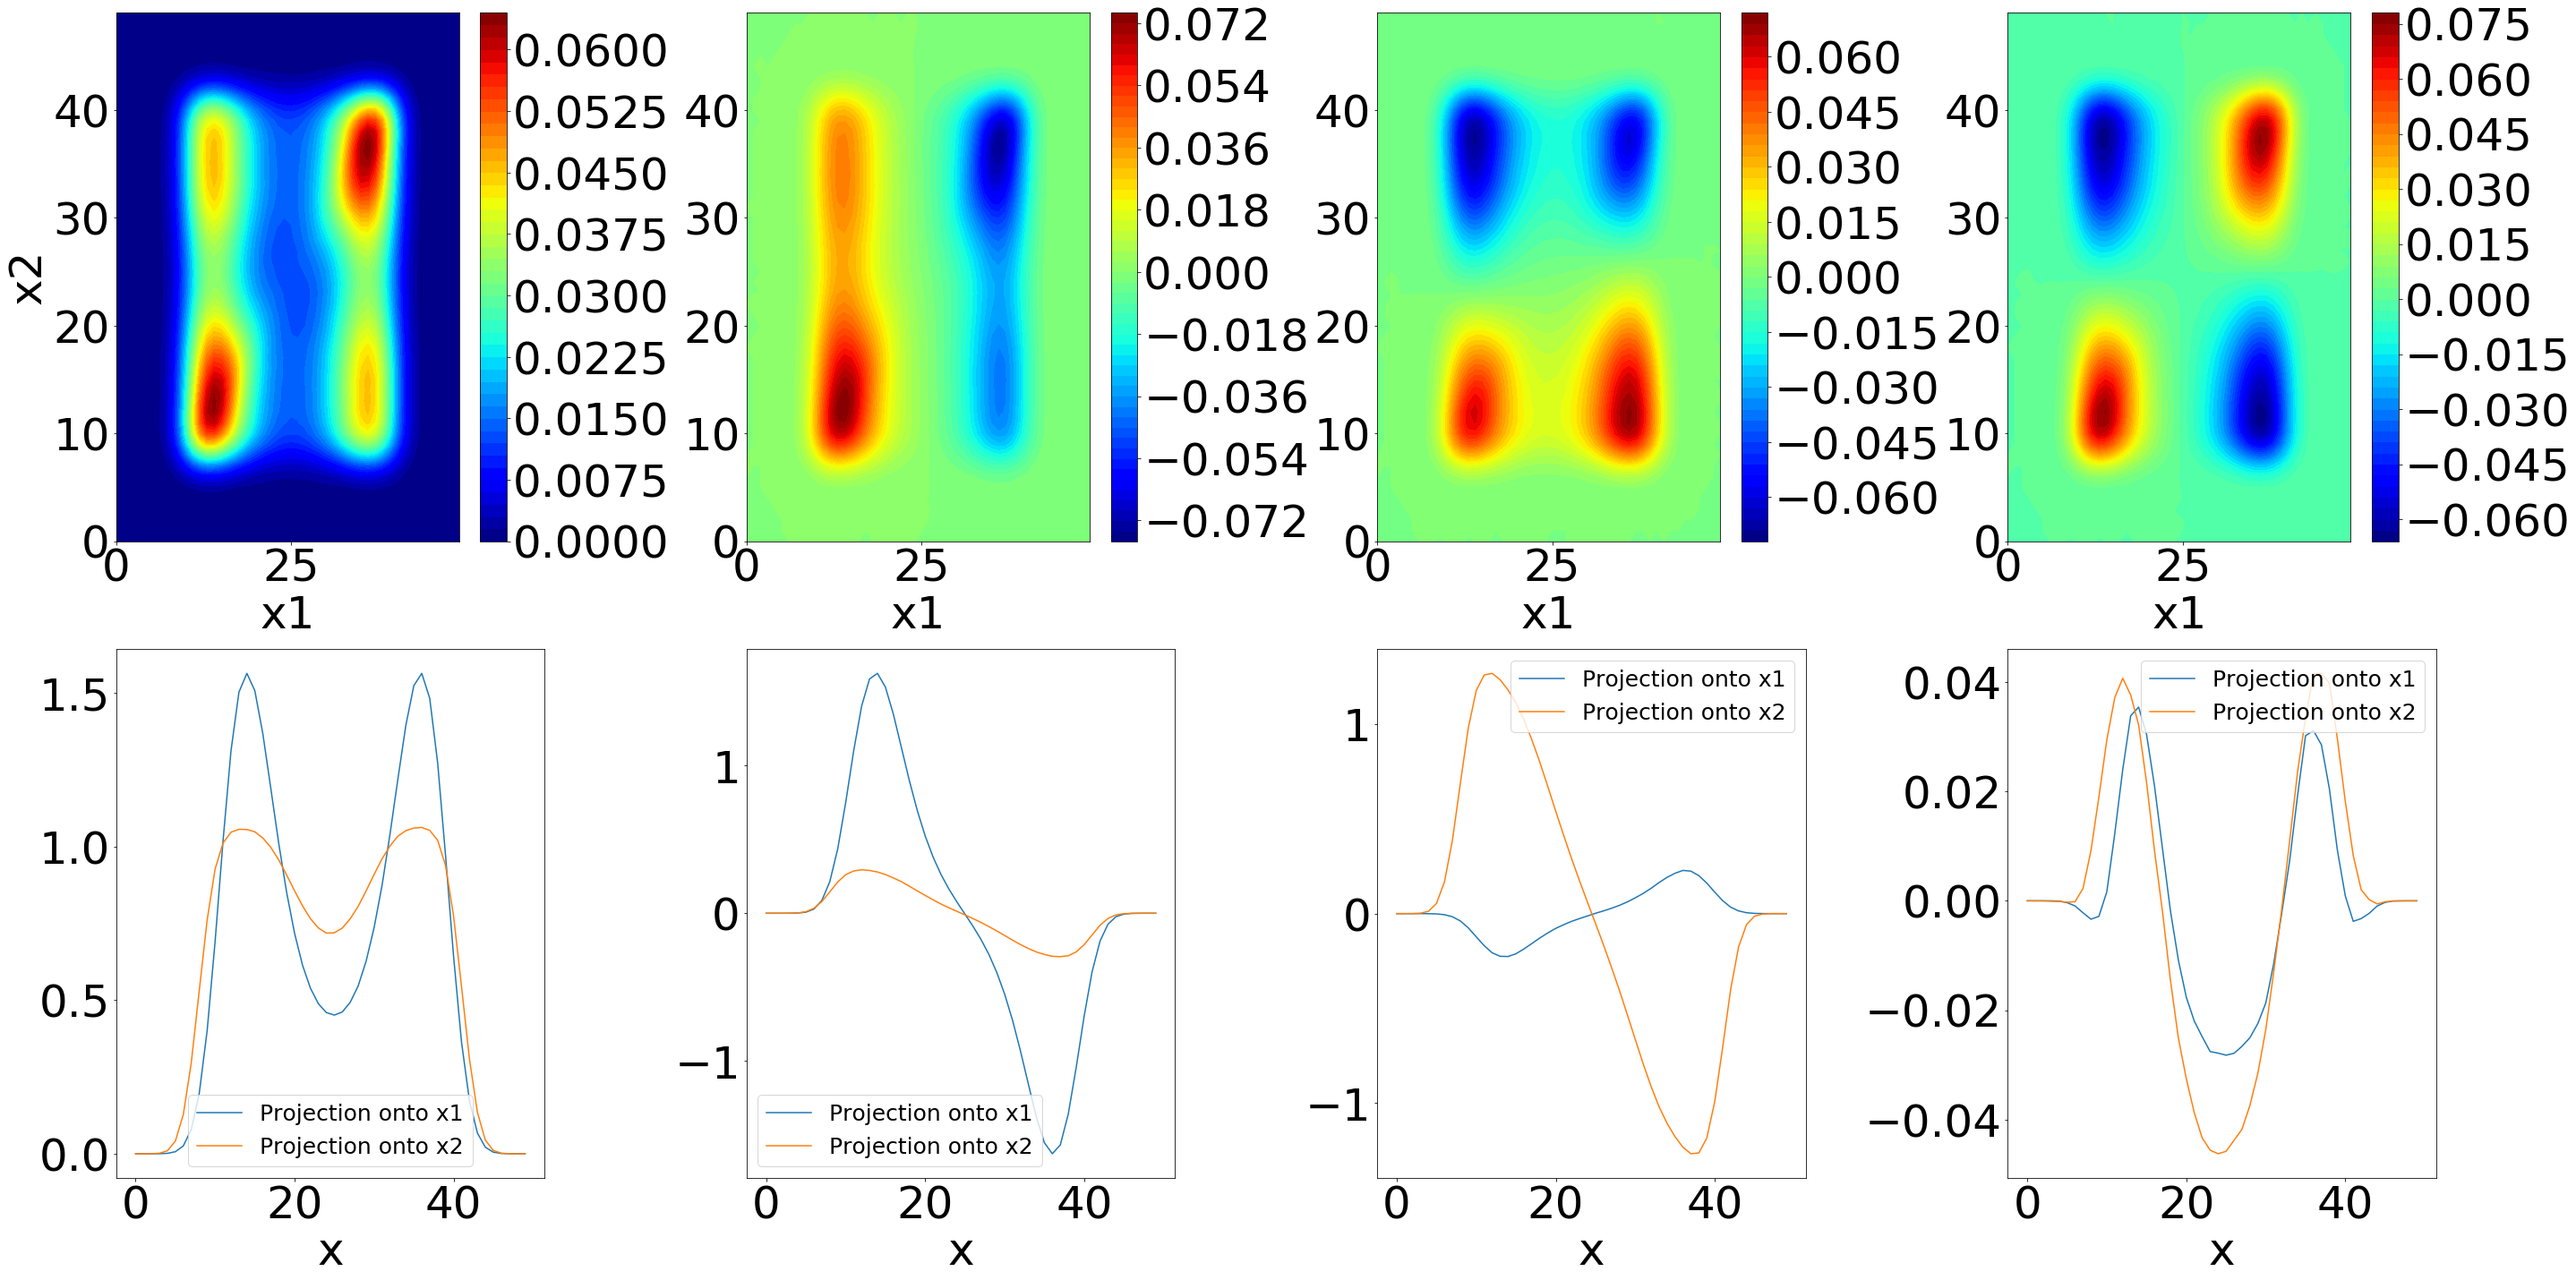

In [850]:
plt.figure(figsize=(40,20))
fs = 50
l=1
plt.subplot(241)
plt.contourf(Vecs[l,:,0].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(245)
plt.plot(Vecs[l,:,0].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,0].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)

plt.subplot(242)
plt.contourf(Vecs[l,:,1].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
# plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(246)
plt.plot(Vecs[l,:,1].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,1].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)

plt.subplot(243)
plt.contourf(Vecs[l,:,2].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
# plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(247)
plt.plot(Vecs[l,:,2].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,2].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)

plt.subplot(244)
plt.contourf(Vecs[l,:,3].reshape(50,50).T,50,cmap=plt.cm.jet)
plt.xlabel('x1',size=fs)
# plt.ylabel('x2',size=fs)
plt.tick_params(labelsize=fs)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=fs)

plt.subplot(248)
plt.plot(Vecs[l,:,3].reshape(50,50).sum(axis=1),label='Projection onto x1')
plt.plot(Vecs[l,:,3].reshape(50,50).sum(axis=0),label='Projection onto x2')
plt.legend(fontsize=fs/2)
plt.xlabel('x',size=fs)
plt.tick_params(labelsize=fs)
# plt.colorbar()

plt.tight_layout()

In [15]:
np.save('Eigenvectors',Vecs)
np.save('Eigenvalues',Vals)

In [3]:
k1=0.003
a1=3.3
k2=1.0
a2=3.5
k12=-50
c=1  
def V(x,y):# actually never used

    return k1 * pow( (x*x - a1*a1), 4) + k2 * pow(y*y - a2*a2, 2) + k12 / np.sqrt((x - y)*(x - y) + c*c) ; 

def DVx(x,y):
    return 8 * k1 * x * pow( (x*x - a1*a1), 3) - k12 * (x - y) / pow((x - y)*(x - y) + c*c, 1.5); 

def DVy(x,y):
    
    return 4 * k2 * y * (y*y - a2*a2) + k12 * (x - y) / pow((x - y)*(x - y) + c*c, 1.5); 


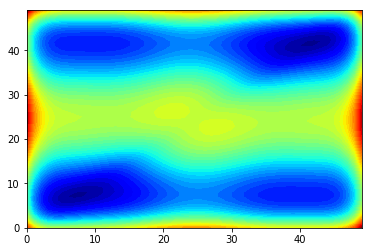

In [16]:
res=50
x = np.linspace(-5,5,res)
dx = np.diff(x).mean()
X,Y = np.meshgrid(x,x)
v = V(X,Y)
v2 = DVy(X,Y)
v1 = DVx(X,Y)
plt.contourf(v,50,cmap=plt.cm.jet)

p_0 = np.zeros((res,res))
p_0[18,:]=np.exp(-(x)**2)
p_0[:,18]+=np.exp(-(x)**2)
I0=np.trapz(np.trapz(p_0,x),x)
p_0/=I0

In [17]:
def p_t(p_0,t,n,Vals,Vecs,l):
    p_t=0
    for i in range(n):
        p_t += Vals[l,i]**t *(Vecs[l,:,i].reshape(50,50)*p_0).sum()*Vecs[l,:,i] 
    return p_t.reshape(50,50)

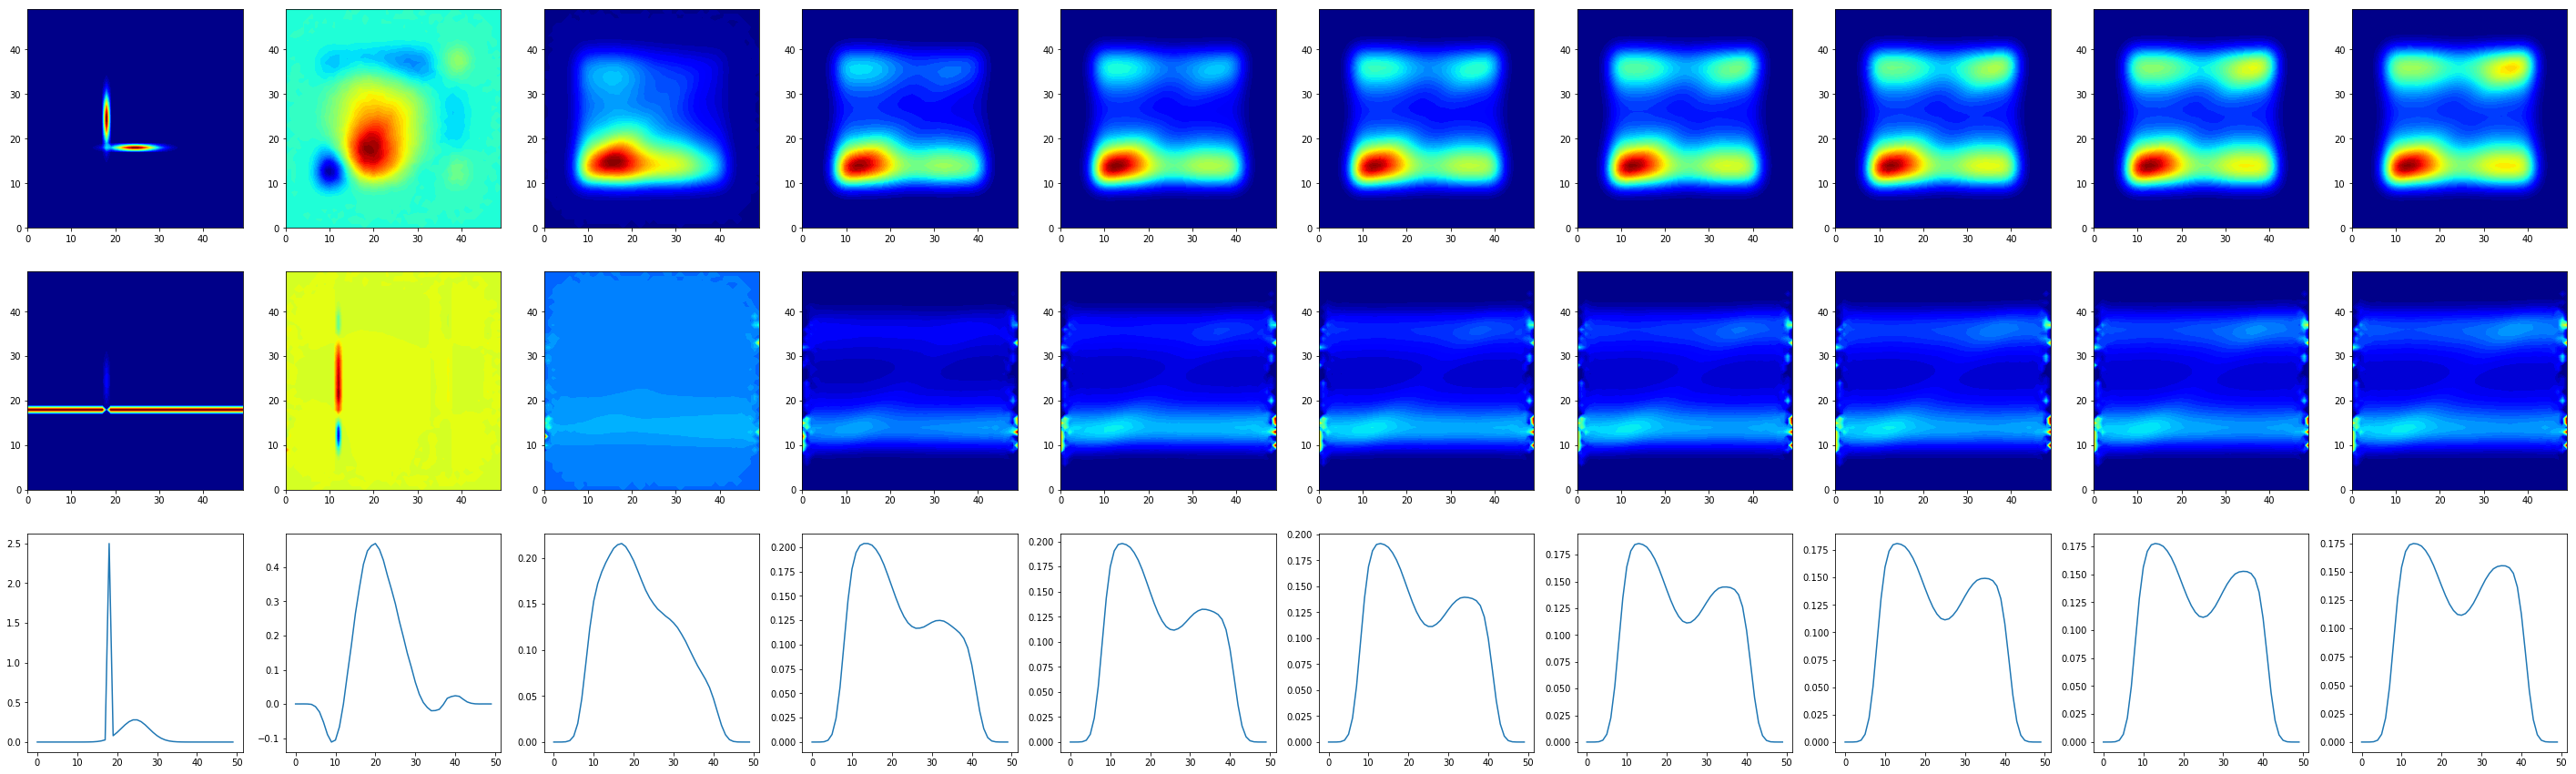

In [18]:


p1=p_0
plt.figure(figsize=(50,15))
for i in np.arange(10):
    
    plt.subplot(3,10,i+1)
    plt.contourf(p1,50,cmap=plt.cm.jet)
    plt.subplot(3,10,i+11)
    plt.contourf(conditional_p(p1),50,cmap=plt.cm.jet)
    plt.subplot(3,10,i+21)
    plt.plot(marginal_p(p1))
#     plt.xticks([])
#     plt.yticks([])
    p1 = p_t(p_0,i,10,Vals,Vecs,3)
#     plt.contourf(p1))
    

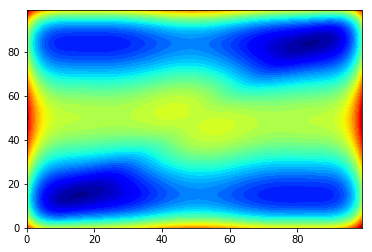

In [52]:
res=100
x = np.linspace(-5,5,res)
dx = np.diff(x).mean()
X,Y = np.meshgrid(x,x)
v = V(X,Y)
v1 = DVy(X,Y)
v2 = DVx(X,Y)
plt.contourf(v,50,cmap=plt.cm.jet)

p_0 = np.zeros((res,res))
p_0[50,:]=np.exp(-(x-x[50])**2)
p_0[:,50]+=np.exp(-(x-x[50])**2)
p_0 += np.random.rand(res,res)
I0=np.trapz(np.trapz(p_0,x),x)
p_0/=I0

In [56]:
# p = pm*pc
# pm := <p>_2
# pc := p/pm


def marginal_p(p):
    # axis=0 is the fast coordinate
    pm = np.trapz(p,x,axis=0)
    I = np.trapz(pm,x)
    return pm/I

def conditional_p(p):
    pm = marginal_p(p)
    pm[pm==0]=1
    pc=p/pm[None]
    I = np.trapz(pc,x,axis=0)
    I[I==0]=1
    pc/=I[:,None]
    return pc

def dt_p_m(pm,pc,sigma=15.):
    
    I = np.trapz(pm,x)
    pm/=I
    I = np.trapz(pc,x,axis=0)
    pc/=I[None]
    
    pad = np.zeros((2+pm.shape[0]))
    pad[1:-1]=pm    
    pm_11=(pad[2:]-2*pad[1:-1]+pad[:-2] )/dx**2
    
    
    pad = np.zeros((2+pm.shape[0]))
    pad[1:-1]=np.trapz(pc*v1,x,axis=0)*pm
    D1Fm = (pad[2:]-pad[:-2])/2./dx
    return sigma*pm_11 +D1Fm

def dt_p_c(pm,pc,sigma=15.):
    
    I = np.trapz(pm,x)
    pm/=I
    I = np.trapz(pc,x,axis=0)
    pc/=I[:,None]
    
    pad = np.zeros((2+pc.shape[0],pc.shape[0]))
    pad[1:-1,:]=pc    
    pc_22=(pad[2:]-2*pad[1:-1]+pad[:-2])/dx**2
    
    pad = np.zeros((2+pc.shape[0],pc.shape[0]))
    pad[1:-1]=(v2*pc)
    D2V2p_c = (pad[2:]-pad[:-2])/2./dx
    
    pad = np.zeros((pc.shape[0],2+pc.shape[0]))
    pad[:,1:-1]=pc    
    pc_11=(pad[:,2:]-2*pad[:,1:-1]+pad[:,:-2])/dx**2
    
    pad = np.zeros((pc.shape[0],2+pc.shape[0]))
    pad[:,1:-1]=(v1*pc)
    D1V1p_c = (pad[:,2:]-pad[:,:-2])/2./dx
    
    pad = np.zeros((pc.shape[0],2+pc.shape[0]))
    pad[:,1:-1]=pc
    pc_1 = (pad[:,2:]-pad[:,:-2])/2./dx
    
    
    pad = np.zeros((2+pm.shape[0]))
    pad[1:-1]=np.trapz(pc*v1,x,axis=0)*pm
    D1Fm = (pad[2:]-pad[:-2])/2./dx
    
    pad = np.zeros((2+pm.shape[0]))
    pad[1:-1]=pm    
    pm_1=(pad[2:]-pad[:-2])/2./dx
    
    pm[pm==0]=1
    
    
    return sigma*pc_22 + D2V2p_c + sigma*pc_11 + D1V1p_c  - D1Fm*pc/pm + pm_1/pm*(sigma*pc_1+v1*pc)


def RK4(p,h=0.0151):
    pc = conditional_p(p)
    pm= marginal_p(p)
    
    k1_pc = dt_p_c(pm,pc)  
    k2_pc = dt_p_c(pm,pc+h/2.*k1_pc)   
    k3_pc = dt_p_c(pm,pc+h/2.*k2_pc)  
    k4_pc = dt_p_c(pm,pc+h*k3_pc)
    pc_new = (pc+h/6.*(k1_pc+2.*k2_pc+2.*k3_pc+k4_pc))
    
    k1_pm = dt_p_m(pm,pc)
    k2_pm = dt_p_m(pm+h/2.*k1_pm,pc)
    k3_pm = dt_p_m(pm+h/2.*k2_pm,pc)
    k4_pm = dt_p_m(pm+h*k3_pm,pc)
    pm_new = (pm+h/6.*(k1_pm+2.*k2_pm+2.*k3_pm+k4_pm))
    return pm_new*pc_new

def RK4_pc_first(p,h=0.0151):
    pc = conditional_p(p)
    pm= marginal_p(p)    
    
    k1_pc = dt_p_c(pm,pc)  
    k2_pc = dt_p_c(pm,pc+h/2.*k1_pc)   
    k3_pc = dt_p_c(pm,pc+h/2.*k2_pc)  
    k4_pc = dt_p_c(pm,pc+h*k3_pc)
    pc_new = (pc+h/6.*(k1_pc+2.*k2_pc+2.*k3_pc+k4_pc))
    
    k1_pm = dt_p_m(pm,pc_new)
    k2_pm = dt_p_m(pm+h/2.*k1_pm,pc_new)
    k3_pm = dt_p_m(pm+h/2.*k2_pm,pc_new)
    k4_pm = dt_p_m(pm+h*k3_pm,pc_new)
    pm_new = (pm+h/6.*(k1_pm+2.*k2_pm+2.*k3_pm+k4_pm))
#     print pc.shape
    return pm_new*pc_new

def RK4_pm_first(p,h=0.0151):
    pc = conditional_p(p)
    pm= marginal_p(p)    
    
    
    k1_pm = dt_p_m(pm,pc)
    k2_pm = dt_p_m(pm+h/2.*k1_pm,pc)
    k3_pm = dt_p_m(pm+h/2.*k2_pm,pc)
    k4_pm = dt_p_m(pm+h*k3_pm,pc)
    pm_new = (pm+h/6.*(k1_pm+2.*k2_pm+2.*k3_pm+k4_pm))
    
    k1_pc = dt_p_c(pm_new,pc)  
    k2_pc = dt_p_c(pm_new,pc+h/2.*k1_pc)   
    k3_pc = dt_p_c(pm_new,pc+h/2.*k2_pc)  
    k4_pc = dt_p_c(pm_new,pc+h*k3_pc)
    pc_new = (pc+h/6.*(k1_pc+2.*k2_pc+2.*k3_pc+k4_pc))
    
    return  pm_new*pc_new

def RK4_p(p,h=0.0151):
    
    k1_p = dt_p(p)
    
    k2_p = dt_p(p+h/2.*k1_p)
       
    k3_p = dt_p(p+h/2.*k2_p)
       
    k4_p = dt_p(p+h*k3_p)
    return (p+h/6.*(k1_p+2.*k2_p+2.*k3_p+k4_p))

def dt_p(p,sigma=15.):
    I0=np.trapz(np.trapz(p,x),x)
    p/=I0

    pad = np.zeros((2+p.shape[0],p.shape[0]))
    pad[1:-1,:]=p    
    p_22=(pad[2:]-2*pad[1:-1]+pad[:-2])/dx**2
    
    pad = np.zeros((p.shape[0],2+p.shape[0]))
    pad[:,1:-1]=p    
    p_11=(pad[:,2:]-2*pad[:,1:-1]+pad[:,:-2])/dx**2
    
    pad = np.zeros((2+p.shape[0],p.shape[0]))
    pad[1:-1]=(v2*p)
    D2V2p = (pad[2:]-pad[:-2])/2./dx
    
    pad = np.zeros((p.shape[0],2+p.shape[0]))
    pad[:,1:-1]=(v1*p)
    D1V1p = (pad[:,2:]-pad[:,:-2])/2./dx
    return sigma*(p_11+p_22)+D1V1p+D2V2p


In [45]:
def dt_p(p,sigma=15.):
    I0=np.trapz(np.trapz(p,x),x)
    p/=I0

    pad = np.zeros((2+p.shape[0],p.shape[0]))
    pad[1:-1,:]=p    
    p_22=(pad[2:]-2*pad[1:-1]+pad[:-2])/dx**2
    
    pad = np.zeros((p.shape[0],2+p.shape[0]))
    pad[:,1:-1]=p    
    p_11=(pad[:,2:]-2*pad[:,1:-1]+pad[:,:-2])/dx**2
    
    pad = np.zeros((2+p.shape[0],p.shape[0]))
    pad[1:-1]=(v2*p)
    D2V2p = (pad[2:]-pad[:-2])/2./dx
    
    pad = np.zeros((p.shape[0],2+p.shape[0]))
    pad[:,1:-1]=(v1*p)
    D1V1p = (pad[:,2:]-pad[:,:-2])/2./dx
    return sigma*(p_11+p_22)+D1V1p+D2V2p

Fail at step 16


/usr/local/sw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: overflow encountered in divide
/usr/local/sw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide
/usr/local/sw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:76: RuntimeWarning: overflow encountered in divide
/usr/local/sw/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less


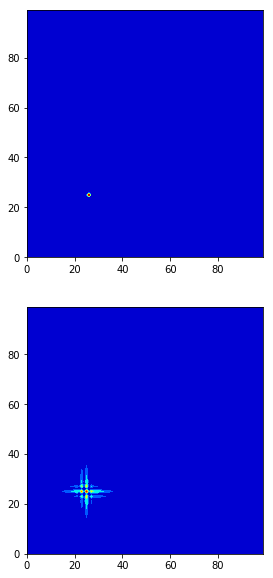

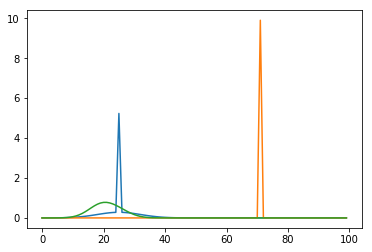

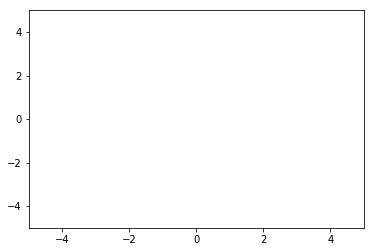

In [46]:
p=p_0
P=p_0
pm = marginal_p(p_0)
pc = conditional_p(p_0)
h=0.001
# p=pm*pc
p_T =[]
p_T.append(pm)
N=10000
k=N/10
plt.figure(figsize=(50,10))
for i in np.arange(N):
    
    p = RK4(p,h)
    P = RK4_p(P,h)
    P[P<0]=0
    p[p<0]=0
    I = np.trapz(np.trapz(P,x),x)
    P/=I
    if np.all(np.isnan(p)):
        print "Fail at step",i
        break
        
#     p[np.isnan(p)]=0
    pm = marginal_p(p)
    p_T.append(pm)

    if k==N/10:
        k=0
        plt.subplot(2,10,i/(N/10)+1)
        plt.contourf(p,cmap=plt.cm.jet)
        plt.subplot(2,10,i/(N/10)+11)
        plt.contourf(P,cmap=plt.cm.jet)
    k+=1
    
plt.figure()
pT = np.array(p_T).T
plt.plot(pT[:,0]);
# plt.plot(pT[:,1]);
plt.plot(pT[:,-1]);
plt.plot(marginal_p(P))

plt.figure()
plt.contourf(x,x,p)

1037988.7058901824
1154357.7776820313
1154379.0332785666
1154379.488630523
1154379.505941913
1154379.5066151882
1154379.5066413244
1154379.5066423388
1154379.5066423784
1154379.5066423798


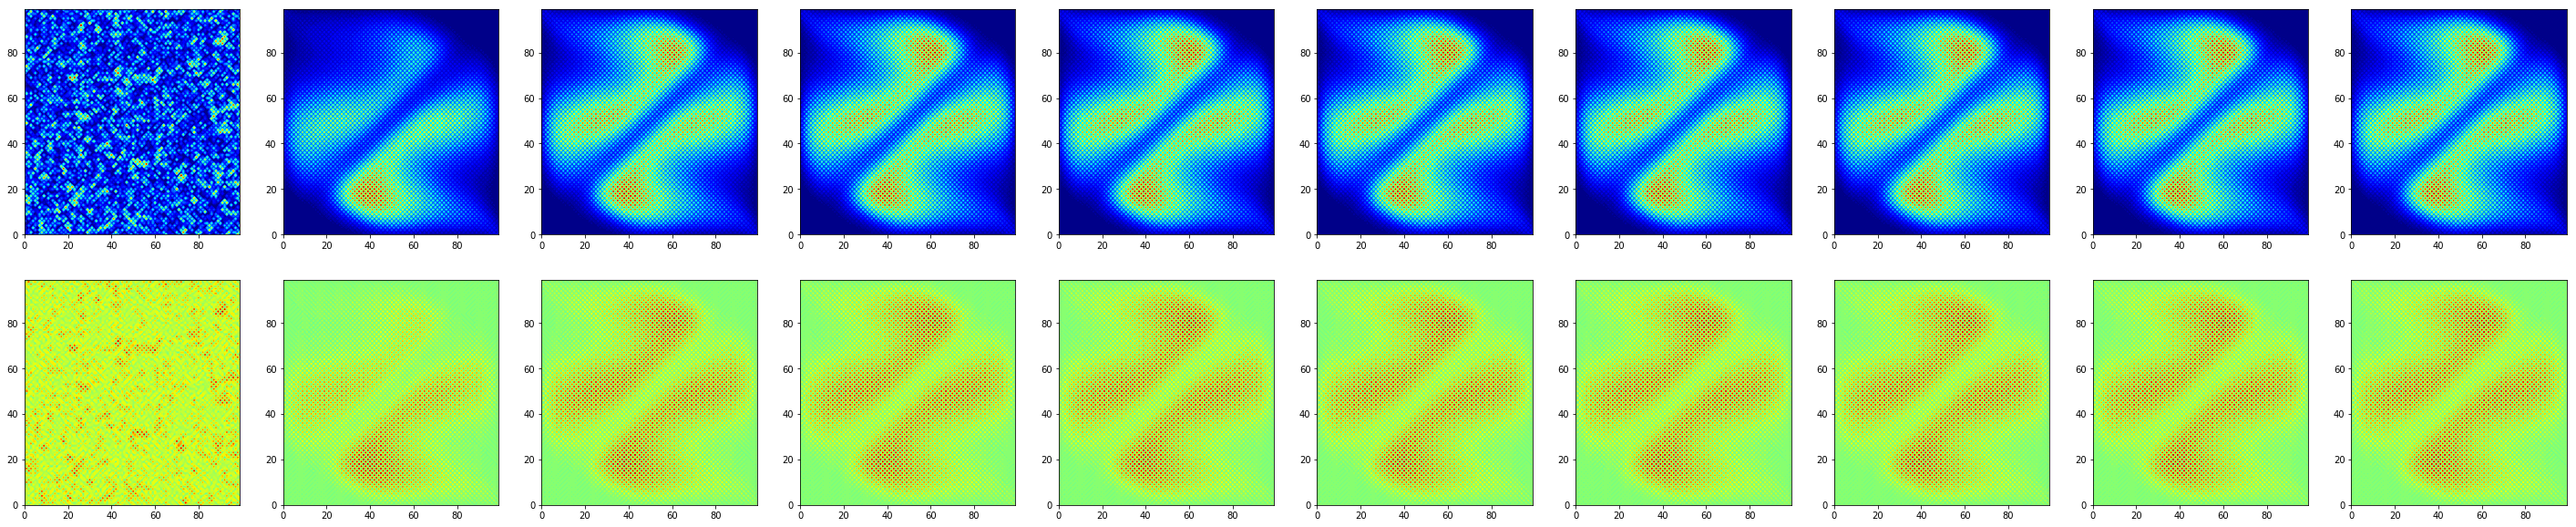

In [57]:
def euler_step(f,f1,dt):
    return f+dt*f1

p = p_0

N=10000
k=N/10
plt.figure(figsize=(50,10))
for i in np.arange(N):
    
#     p = RK4(p,h=0.001)
#     p = euler_step(p,dt_p(p),5e-1)
    
    p = RK4_p(p,h=0.05)
    p[p<0]=0
    I = np.trapz(np.trapz(p,x),x)
    p/=I
#     print np.min(p)
    if np.all(np.isnan(p)):
        print "Fail at step",i
        break
        
    if k==N/10:
        k=0
        plt.subplot(2,10,i/(N/10)+1)
        plt.contourf(p,50,cmap=plt.cm.jet)
        plt.subplot(2,10,i/(N/10)+11)
        plt.contourf(dt_p(p),50,cmap=plt.cm.jet)
        print np.sum(abs(p-dt_p(p)))
    k+=1
    

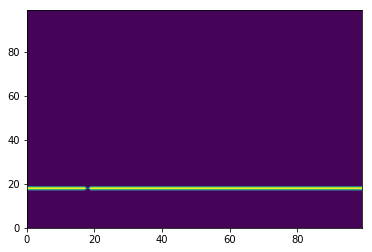

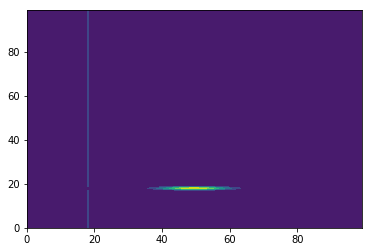

In [873]:
pm = marginal_p(p_0)
pc = conditional_p(p_0)
plt.contourf(pc,50)
I0=np.trapz(np.trapz(p_0,x))
p_0/=I0
plt.figure()
plt.contourf(pm*pc)

0.10101010101010101
0.9999999999999999


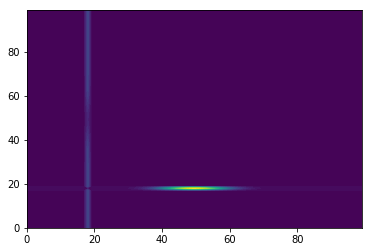

In [874]:
plt.contourf(pm*pc-p_0,50)
print np.trapz(np.trapz(p_0,x),x)
print np.trapz(np.trapz(pm*pc,x),x)